In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import missingno as msno
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

sns.set()

In [2]:
census = pd.read_csv('acs2015_county_data.csv')

In [3]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


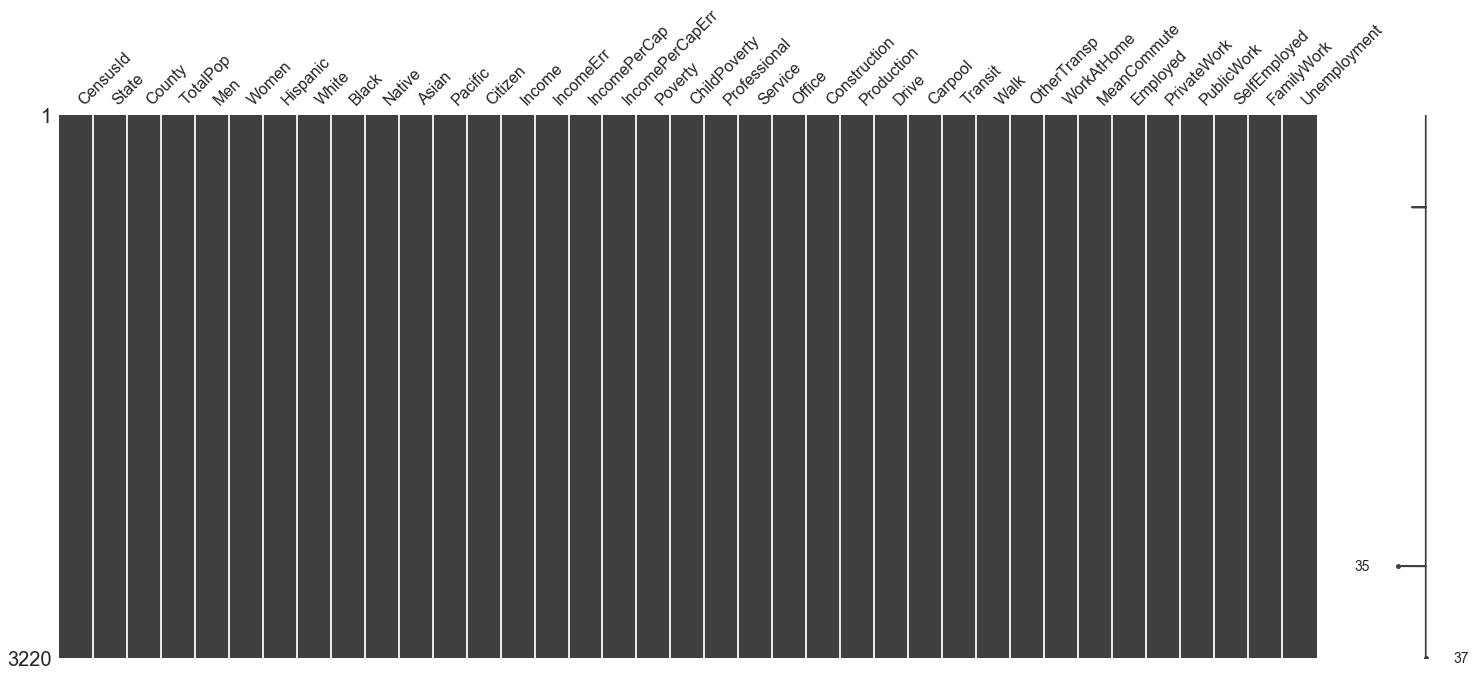

In [4]:
msno.matrix(census)

In [5]:
census['PercentMen'] = 100 * census['Men'] / census['TotalPop']
census['PercentWomen'] = 100 * census['Women'] / census['TotalPop']
census['PercentCitizen'] = 100 * census['Citizen'] / census['TotalPop']
census['PercentNonCitizen'] = 100 - census['PercentCitizen']

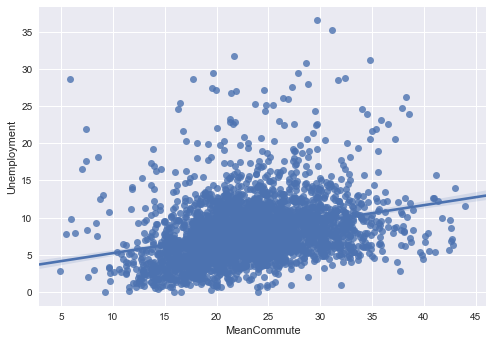

In [6]:
sns.regplot(x='MeanCommute', y='Unemployment', data=census)

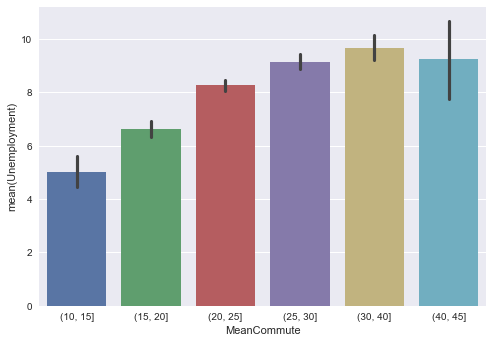

In [7]:
mean_commute6 = pd.cut(census['MeanCommute'], [10, 15, 20, 25, 30, 40, 45])
unemployment = census['Unemployment']
fig = sns.barplot(x=mean_commute6, y=unemployment)

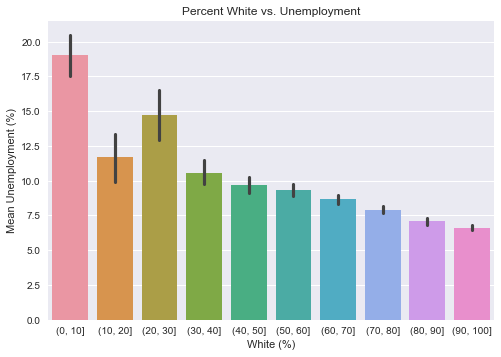

In [8]:
white10 = pd.cut(census['White'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
unemployment = census['Unemployment']
fig = sns.barplot(x=white10, y=unemployment)
fig.set(xlabel='White (%)', ylabel='Mean Unemployment (%)')
fig.set_title('Percent White vs. Unemployment')
fig

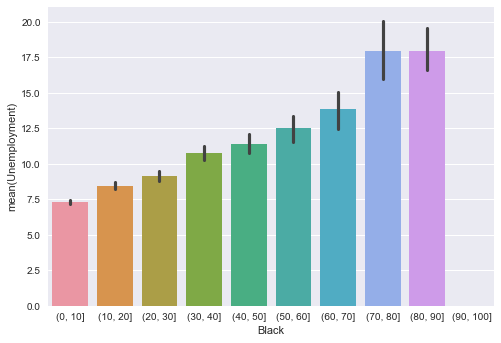

In [9]:
black10 = pd.cut(census['Black'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
unemployment = census['Unemployment']
sns.barplot(x=black10, y=unemployment)

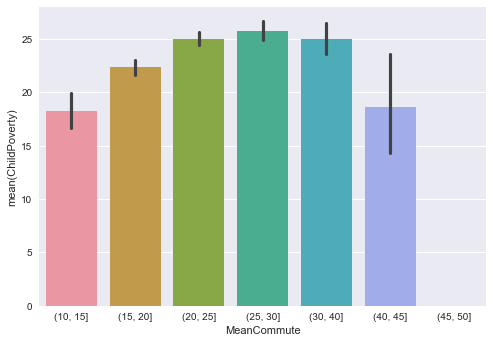

In [10]:
mean_commute6 = pd.cut(census['MeanCommute'], [10, 15, 20, 25, 30, 40, 45, 50])
child_poverty = census['ChildPoverty']
sns.barplot(x=mean_commute6, y=child_poverty)

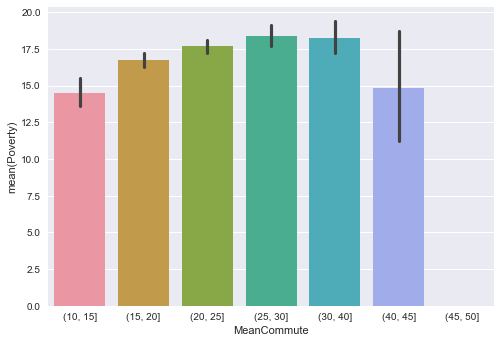

In [11]:
mean_commute6 = pd.cut(census['MeanCommute'], [10, 15, 20, 25, 30, 40, 45, 50])
poverty = census['Poverty']
sns.barplot(x=mean_commute6, y=poverty)

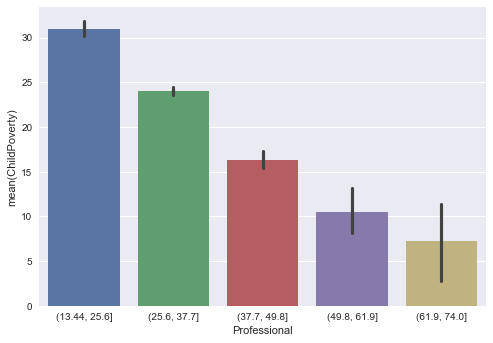

In [12]:
professional5 = pd.cut(census['Professional'], 5)
child_poverty = census['ChildPoverty']
sns.barplot(x=professional5, y=child_poverty)

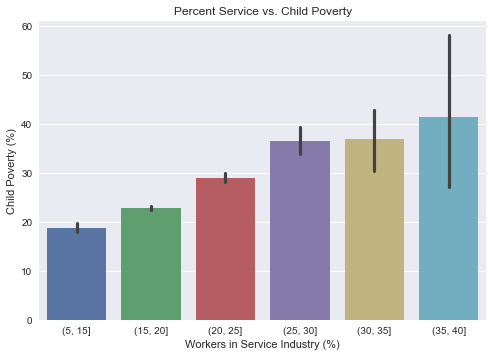

In [13]:
professional6 = pd.cut(census['Service'], [5, 15, 20, 25, 30, 35, 40])
child_poverty = census['ChildPoverty']
fig = sns.barplot(x=professional6, y=child_poverty)
fig.set(xlabel='Workers in Service Industry (%)', ylabel='Child Poverty (%)')
fig.set_title('Percent Service vs. Child Poverty')
fig

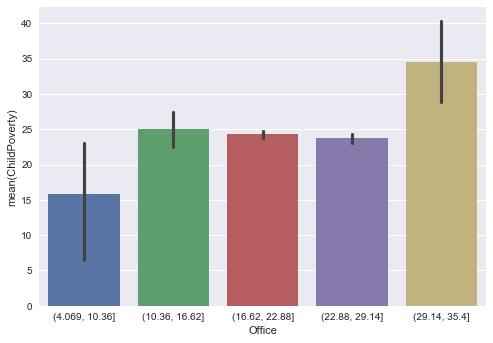

In [14]:
office5 = pd.cut(census['Office'], 5)
child_poverty = census['ChildPoverty']
sns.barplot(x=office5, y=child_poverty)

In [15]:
census['PercentWhite'] = pd.cut(census['White'], [0, 20, 40, 60, 80, 100])

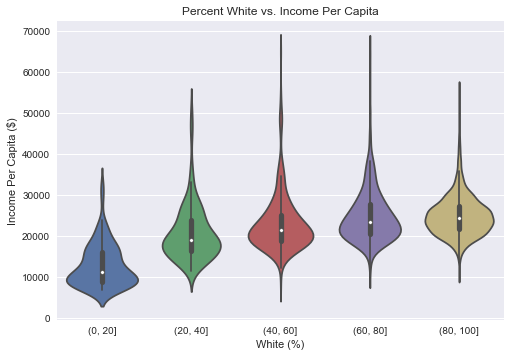

In [16]:
fig = sns.violinplot(x='PercentWhite', y='IncomePerCap', data=census)
fig.set(xlabel='White (%)', ylabel='Income Per Capita ($)')
fig.set_title('Percent White vs. Income Per Capita')
fig

In [17]:
census['PercentBlack'] = pd.cut(census['Black'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

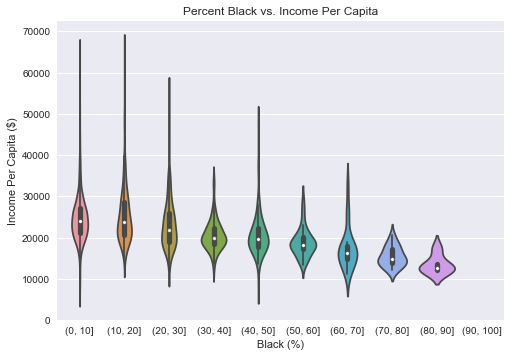

In [18]:
fig = sns.violinplot(x='PercentBlack', y='IncomePerCap', data=census)
fig.set(xlabel='Black (%)', ylabel='Income Per Capita ($)')
fig.set_title('Percent Black vs. Income Per Capita')
fig

In [19]:
#Mean Commute vs. Unemployment - Positive Correlation
#Mean Commute vs. Poverty - Positive Correlation
#Mean Commute vs. Income Per Cap - Negative Correlation
#Black vs. MeanCommute - Positive Correlation
#White vs. MeanCommute - Negative Correlation

state_abbrev_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_abbrev_dict = {state: abbrev for abbrev, state in state_abbrev_dict.items()}

census['StateAbbrev'] = census['State'].map(state_abbrev_dict.get)
census['Unemployed'] = census['TotalPop'] * census['Unemployment']
census_grouped = census.groupby('StateAbbrev', as_index=False)
census_by_state = census_grouped.sum()
census_by_state['StateUnemployment'] = census_by_state['Unemployed'] / census_by_state['TotalPop']
census_by_state['StateAbbrev']

0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    HI
12    IA
13    ID
14    IL
15    IN
16    KS
17    KY
18    LA
19    MA
20    MD
21    ME
22    MI
23    MN
24    MO
25    MS
26    MT
27    NC
28    ND
29    NE
30    NH
31    NJ
32    NM
33    NV
34    NY
35    OH
36    OK
37    OR
38    PA
39    PR
40    RI
41    SC
42    SD
43    TN
44    TX
45    UT
46    VA
47    VT
48    WA
49    WI
50    WV
51    WY
Name: StateAbbrev, dtype: object

In [20]:
states = census_by_state['StateAbbrev']
unemployment = census_by_state['StateUnemployment'].tolist()

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states,
        z = unemployment,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Unemployed")
        ) ]

layout = dict(
        title = 'Unemployment Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='us-map' )

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [22]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,FamilyWork,Unemployment,PercentMen,PercentWomen,PercentCitizen,PercentNonCitizen,PercentWhite,PercentBlack,StateAbbrev,Unemployed
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.0,7.6,48.432661,51.567339,73.749117,26.250883,"(60, 80]","(10, 20]",AL,419679.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,0.4,7.5,48.848663,51.151337,75.694057,24.305943,"(80, 100]","(0, 10]",AL,1463407.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,0.1,17.6,53.828160,46.171840,76.912223,23.087777,"(40, 60]","(40, 50]",AL,474003.2
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.4,8.3,53.410901,46.589099,77.397806,22.602194,"(60, 80]","(20, 30]",AL,187613.2
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,7.7,49.405649,50.594351,73.375498,26.624502,"(80, 100]","(0, 10]",AL,444367.0
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,0.0,18.0,53.006181,46.993819,75.454205,24.545795,"(20, 40]","(70, 80]",AL,192204.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.2,10.9,46.683699,53.316301,76.550064,23.449936,"(40, 60]","(40, 50]",AL,221858.6
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,0.1,12.3,48.242576,51.757424,75.965297,24.034703,"(60, 80]","(20, 30]",AL,1434770.4
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.0,8.9,47.706799,52.293201,77.648992,22.351008,"(40, 60]","(40, 50]",AL,303303.1
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.5,7.9,49.888496,50.111504,79.206398,20.793602,"(80, 100]","(0, 10]",AL,205463.2


Linear Model for White % to Income Per capita

In [23]:
train, test = train_test_split(census[['White', 'IncomePerCap']], test_size=0.2)
train_x1, train_y1 = train[[ 'White']], train[['IncomePerCap']]
test_x1, test_y1 = test[['White']], test[['IncomePerCap']]

In [24]:
l1 = LinearRegression()
l1.fit(train_x1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_train_pred = l1.predict(train_x1)
y_test_pred = l1.predict(test_x1)
print('train R^2: ', 
      r2_score(train_y1, y_train_pred, multioutput = 'uniform_average'))
print('test R^2: ', 
      r2_score(test_y1, y_test_pred, multioutput = 'uniform_average'))
# train_y1['IncomePerCap'].values.astype(float)
# y_train_pred

train R^2:  0.11454257325
test R^2:  0.135938057786


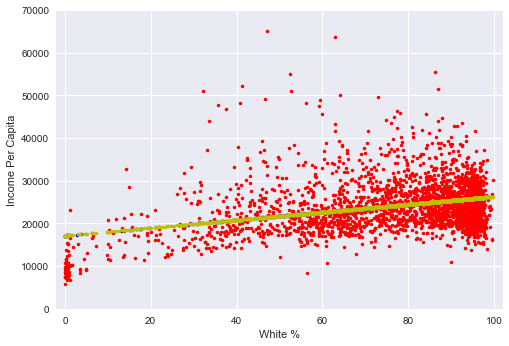

In [26]:
plt.plot(train_x1, train_y1, 'r.', test_x1, y_test_pred, 'b.', train_x1, y_train_pred, 'y.')
plt.axis([-2, 102, 0, 70000])
plt.xlabel('White %')
plt.ylabel('Income Per Capita')

Model for MeanCommute time and % Employed to predict % Below Poverty

In [27]:
census['PercentEmployed'] = 100 * census['Employed'] / census['TotalPop']
l2_train, l2_test = train_test_split(census[['PercentEmployed', 'PrivateWork', 'Poverty']], test_size=0.2)
l2_train_x, l2_train_y = l2_train[['PercentEmployed', 'PrivateWork']], l2_train[['Poverty']]
l2_test_x, l2_test_y = l2_test[['PercentEmployed', 'PrivateWork']], l2_test[['Poverty']]

In [28]:
l2 = LinearRegression()
l2.fit(l2_train_x, l2_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
l2_train_y_pred = l2.predict(l2_train_x)
l2_test_y_pred = l2.predict(l2_test_x)
print('train R^2: ', 
      r2_score(l2_train_y, l2_train_y_pred, multioutput = 'uniform_average'))
print('test R^2: ', 
      r2_score(l2_test_y, l2_test_y_pred, multioutput = 'uniform_average'))

train R^2:  0.558523949244
test R^2:  0.493903247303


Visualization of Training Data

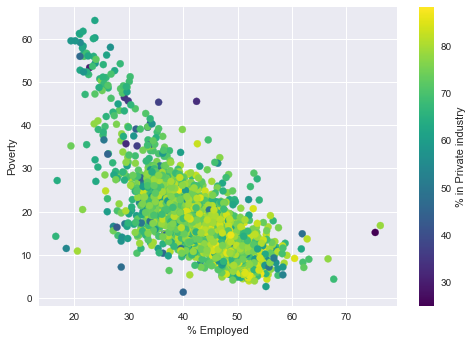

In [30]:
fig, ax = plt.subplots()
scat = ax.scatter(l2_train_x['PercentEmployed'], l2_train_y, c=l2_train_x['PrivateWork'], s=200, marker='.', cmap='viridis')
fig.colorbar(scat).set_label("% in Private industry")
plt.xlabel("% Employed")
plt.ylabel("Poverty")
plt.show()

Visualization of Training Data Predictions

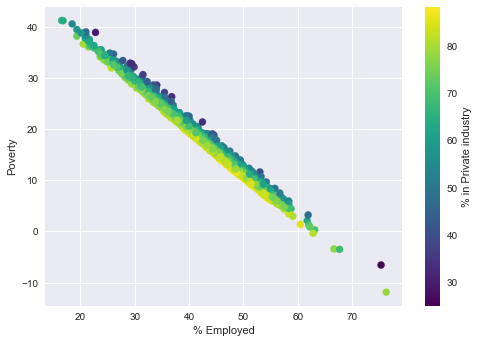

In [31]:
fig, ax = plt.subplots()
scat = ax.scatter(l2_train_x['PercentEmployed'], l2_train_y_pred, c=l2_train_x['PrivateWork'], s=200, marker='.', cmap='viridis')
fig.colorbar(scat).set_label("% in Private industry")
plt.xlabel("% Employed")
plt.ylabel("Poverty")
plt.show()

Visualization of Test Data Predictions

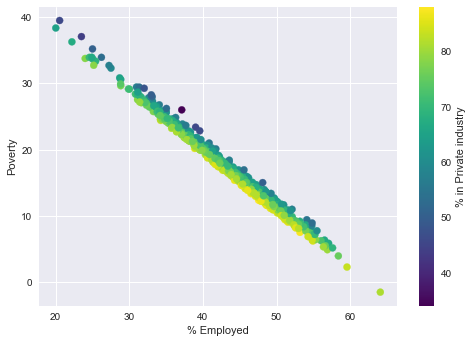

In [32]:
fig, ax = plt.subplots()
scat = ax.scatter(l2_test_x['PercentEmployed'], l2_test_y_pred, c=l2_test_x['PrivateWork'], s=200, marker='.', cmap='viridis')
fig.colorbar(scat).set_label("% in Private industry")
plt.xlabel("% Employed")
plt.ylabel("Poverty")
plt.show()

Model for % in Professional Work to Income Per Capita

(Professional work includes management, business, science, and the arts)

In [68]:
l3_train, l3_test = train_test_split(census[['Professional', 'IncomePerCap']], test_size=0.2)
l3_train_x, l3_train_y = l3_train[['Professional']], l3_train[['IncomePerCap']]
l3_test_x, l3_test_y = l3_test[['Professional']], l3_test[['IncomePerCap']]

In [69]:
# l3_train_x.fillna(l3_train_x.mean())
# l3_train_y.fillna(l3_train_y.mean())
print(np.any(np.isnan(l3_train_x))) #if any value is nan
print(np.all(np.isfinite(l3_train_x))) #if all values are finite
np.where(np.isnan(l3_train_x))

False
True


(array([], dtype=int64), array([], dtype=int64))

Fitting Polynomial of degree 3 and using Ridge (Linear least squares with l2 regularization)
Accuracy uneffe

In [70]:
# l3 = LinearRegression()
l3 = make_pipeline(PolynomialFeatures(3), Ridge())
l3.fit(l3_train_x, l3_train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [71]:
print(np.any(np.isnan(l3_test_x))) #if any value is nan
print(np.all(np.isfinite(l3_test_x))) #if all values are finite
np.where(np.isnan(l3_test_x))

False
True


(array([], dtype=int64), array([], dtype=int64))

In [72]:
l3_train_y_pred = l3.predict(l3_train_x)
l3_test_y_pred = l3.predict(l3_test_x)
print('train R^2: ', 
      r2_score(l3_train_y, l3_train_y_pred))
print('test R^2: ', 
      r2_score(l3_test_y, l3_test_y_pred))

train R^2:  0.450159454822
test R^2:  0.396021854533


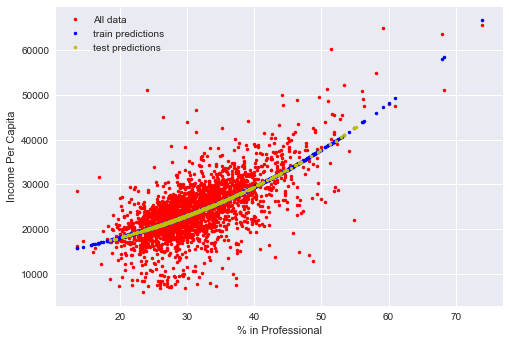

In [103]:
# a = plt.plot(l3_train_x, l3_train_y, 'r.', l3_train_x, l3_train_y_pred, 'b.', 
#              l3_test_x, l3_test_y_pred, 'y.')
data = plt.plot(l3_train_x, l3_train_y, 'r.', label='All data')
train_3 = plt.plot(l3_train_x, l3_train_y_pred, 'b.', label='train predictions')
test_3 = plt.plot(l3_test_x, l3_test_y_pred, 'y.', label='test predictions')
plt.xlabel("% in Professional")
plt.ylabel("Income Per Capita")
plt.legend()